In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. Import Data and do data quality inspection

In [2]:
data = pd.read_csv("Car_dataset.csv") 
data['src_ad_id'] = data['src_ad_id'].apply(lambda x: '{:.0f}'.format(x))

# add date info
data['date'] = pd.to_datetime(data['ad_start_dt'])
data['day_of_week'] = data['date'].dt.day_name()

# fill na in data
data['group'].fillna('no_test', inplace=True)

# for emissie is null, it is mostly electrical cars, so we fill in emissie as 0 and energy label as A
#data['emissie'].fillna(0, inplace=True)
data['energielabel'] = np.where(data['emissie'].isna(), 'A', data['energielabel'])
data['emissie']= pd.to_numeric(data['emissie'], errors='coerce')

# remove outlier with null values
data = data[(data['telclicks'].isnull()== False) & (data['price'].isnull()== False)\
          &(data['model'].isnull()== False) & (data['aantalstoelen'].isnull()== False)]
data.head(5).T

,0,1,2,3,4
src_ad_id,1123009959,1018323670,1092848988,1151159673,1061622715
telclicks,1,0,0,3,0
bids,0,0,0,0,0
kleur,Zilver of Grijs,Zilver of Grijs,Zilver of Grijs,Zwart,Zilver of Grijs
carrosserie,Hatchback (3/5-deurs),Hatchback (3/5-deurs),Stationwagon,Sedan (2/4-deurs),MPV
kmstand,44958,25072,301409,194481,238101
days_live,31,31,31,31,9
photo_cnt,16,22,12,21,8
aantaldeuren,3,5,5,4,4
n_asq,0,1,0,1,0


In [3]:
data['auto_age'] = 2016 - data['bouwjaar']
data['auto_age'].describe()

count    183044.000000
mean          8.827074
std           5.437484
min           0.000000
25%           4.000000
50%           9.000000
75%          13.000000
max          25.000000
Name: auto_age, dtype: float64

In [4]:
# Create column has_view 
# has_view = 1 if any of the view actions has happened
# 73% has_view rate (similar as click-through rate)
data['has_view'] = np.where(((data['telclicks']==0) & (data['bids']==0)\
                             & (data['n_asq']==0 ) & (data['webclicks']==0)), 0, 1)
data['nr_view']= data['telclicks'] + data['bids'] + data['n_asq'] + data['webclicks']
#data['has_phone_nr'] = np.where(data['telclicks']>0, 1, 0)
#data['allow_bid'] = np.where(data['bids']>0, 1, 0)
#data['has_email'] = np.where(data['n_asq']>0, 1, 0)
#data['has_url'] = np.where(data['webclicks']>0, 1, 0)

data['has_view'].describe()

count    183044.000000
mean          0.737773
std           0.439846
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: has_view, dtype: float64

In [5]:
data.isnull().sum()

src_ad_id           0
telclicks           0
bids                0
kleur               0
carrosserie         0
kmstand          1404
days_live           0
photo_cnt           0
aantaldeuren        0
n_asq               0
bouwjaar            0
emissie           191
energielabel        0
brand               0
l2                  0
ad_start_dt         0
vermogen            0
webclicks           0
model               0
aantalstoelen       0
price               0
group               0
date                0
day_of_week         0
auto_age            0
has_view            0
nr_view             0
dtype: int64

In [6]:
data.describe()

,telclicks,bids,kmstand,days_live,photo_cnt,n_asq,bouwjaar,emissie,vermogen,webclicks,price,auto_age,has_view,nr_view
count,183044.000000,183044.000000,1.816400e+05,183044.000000,183044.000000,183044.000000,183044.000000,182853.000000,183044.000000,183044.000000,1.830440e+05,183044.000000,183044.000000,183044.000000
mean,0.916911,0.678170,1.448701e+05,27.647052,15.560619,0.990603,2007.172926,129.459582,85.585986,2.739472,1.009358e+05,8.827074,0.737773,5.325157
std,2.417599,2.200827,9.323006e+04,20.929105,6.429411,2.706625,5.437484,69.360728,41.239940,6.229501,9.212029e+05,5.437484,0.439846,9.246810
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1991.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.708825e+04,14.000000,10.000000,0.000000,2003.000000,100.000000,57.000000,0.000000,2.150000e+04,4.000000,0.000000,0.000000
50%,0.000000,0.000000,1.384150e+05,31.000000,15.000000,0.000000,2007.000000,139.000000,77.000000,1.000000,5.950000e+04,9.000000,1.000000,2.000000
75%,1.000000,0.000000,1.999780e+05,31.000000,22.000000,1.000000,2012.000000,173.000000,100.000000,3.000000,1.195000e+05,13.000000,1.000000,7.000000
max,162.000000,124.000000,1.500000e+06,134.000000,24.000000,282.000000,2016.000000,575.000000,594.000000,410.000000,1.000000e+08,25.000000,1.000000,483.000000


In [7]:
data['group'].value_counts()

A          94274
B          80158
no_test     8612
Name: group, dtype: int64

Cars without input kmstand has older bouwjaar than the cars with input kmstand. <br>
<font color='blue'>Cars without input kmstand has more user activity. </font><br>

Possible reason is the old timer cars are without kmstand. However, from the top 5 brand, we could not see that directly. <br>
Suggestion: <br>
<br>
<font color='blue'>
Create a feature called 'is_old_timer_car' might help us with the user activity prediction.</font>

# 2. Features related to User Acitivity 

## 2.1 Distribution of has_view by Categorical Fields

Categorical fields : kleur, carrosserie, aantaldeuren, bouwjaar, energielabel, brand, ,model, aantalstoelen, photo_cnt

### <font color='blue'>Most of the users are lookings for 
<font color='blue'>
- cars made in 2002 - 2008, around 10 years ago (might be cheaper)
- cars with 5 or 4 doors with 5 seats 
- ads with 24 photos
- famous brands, especially German and French brand</font>
<br>
Details:
* Kleur: Users have more interested in Zilver or Grijs, Zwart, Blauw cars than other colors.  
* Carrosserie: Users have more interested in Hachback, StationWagon, Sedan & MPV cars. 
* Anntaldeuren: Interests 5 doors > 4 doors > 3 doors > 2doors > more than 5 doors
* Bouwjaar: Mostly intersted in year 2002 - 2008 than year > 2010, cars are cheaper if they are 10 years old
* Energielabel: Energy label C, D, E are more favoured might related to bouwjaar
* Brand & Model : German cars seems to have higher probability of user actvitiy. Users are looking for more stable cars.

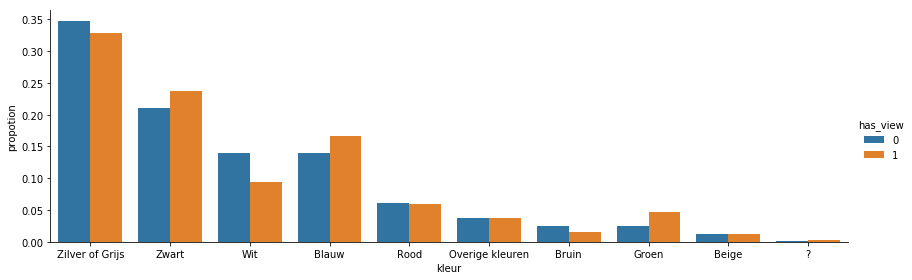

In [8]:
#sns.catplot(x="kleur", hue="group", kind = "count", data = df)
x, y, hue = "kleur", "propotion", "has_view"
#hue_order = ["A", "B", "no_test"]

(data[x]
 .groupby(data[hue])
 .value_counts(normalize=True)
# .value_counts()
 .rename(y)
 .reset_index()
# .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
 .pipe((sns.catplot, "data"), x=x, y=y, hue=hue, kind = 'bar', height = 4, aspect = 3))

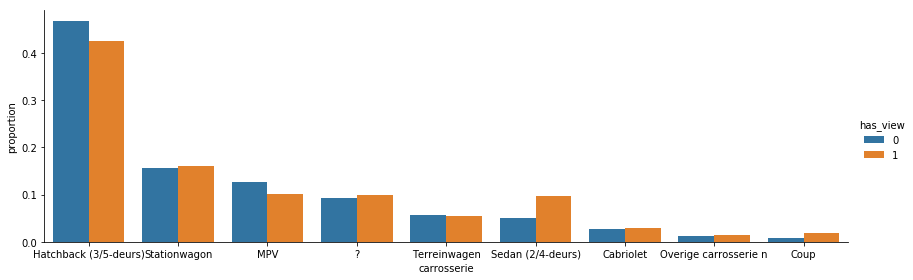

In [9]:
x, y, hue = "carrosserie", "proportion", "has_view"
#hue_order = ["A", "B", "no_test"]

(data[x]
 .groupby(data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
# .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
 .pipe((sns.catplot, "data"), x=x, y=y, hue=hue, kind = 'bar', height = 4, aspect = 3))

4_5door    136538
2_3door     40879
Unknown      5386
6+door        212
1door          29
Name: nr_door, dtype: int64

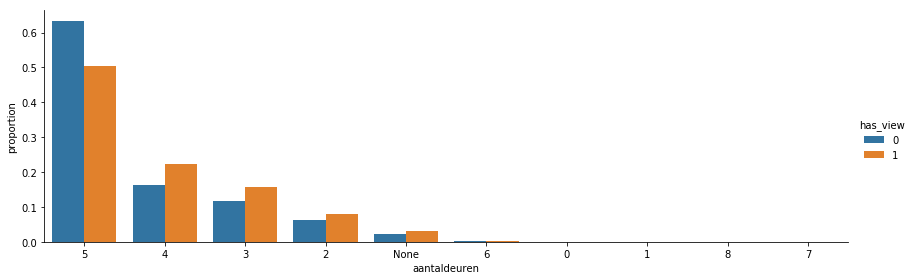

In [10]:
x, y, hue = "aantaldeuren", "proportion", "has_view"
#hue_order = ["A", "B", "no_test"]

(data[x]
 .groupby(data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
# .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
 .pipe((sns.catplot, "data"), x=x, y=y, hue=hue, kind = 'bar', height = 4, aspect = 3))

col = 'aantaldeuren'
conditions = [data[col] =='1', (data[col].isin(['2','3'])), (data[col].isin(['4','5'])), (data[col].isin(['6','7','8']))]                                                                     
choices = ["1door","2_3door","4_5door",'6+door']
data['nr_door'] = np.select(conditions, choices, default = "Unknown")
data['nr_door'].value_counts()

4_5chair    149596
2_3chair     13452
Unknown      11746
6+chair       8207
1chair          43
Name: nr_chair, dtype: int64

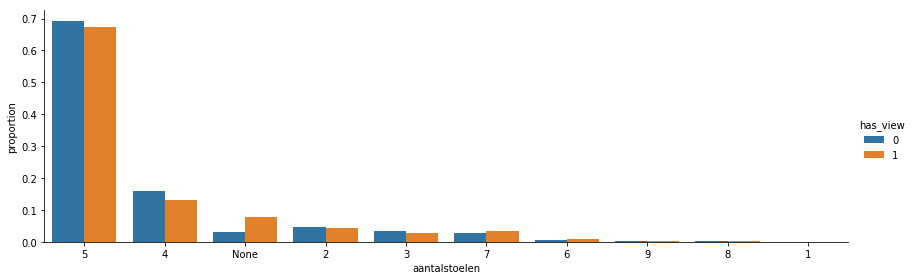

In [11]:
x, y, hue = "aantalstoelen", "proportion", "has_view"
#hue_order = ["A", "B", "no_test"]

(data[x]
 .groupby(data[hue])
 .value_counts(normalize=True)
 .nlargest(20)
 .rename(y)
 .reset_index()
# .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
 .pipe((sns.catplot, "data"), x=x, y=y, hue=hue, kind = 'bar', height = 4, aspect = 3))

col = 'aantalstoelen'
conditions = [data[col] =='1', (data[col].isin(['2','3'])), (data[col].isin(['4','5'])), (data[col].isin(['6','7','8','9']))]                                                                     
choices = ["1chair","2_3chair","4_5chair",'6+chair']
data['nr_chair'] = np.select(conditions, choices, default = "Unknown")
data['nr_chair'].value_counts()

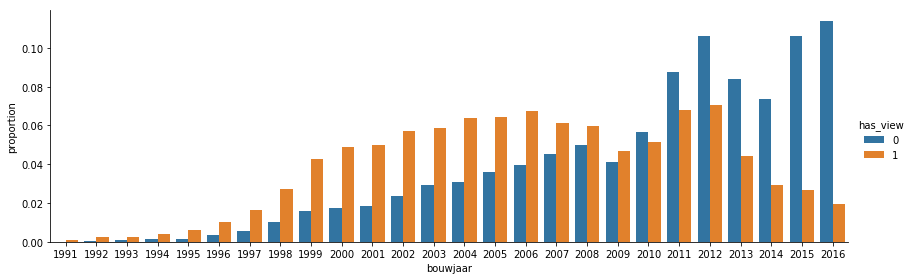

In [12]:
x, y, hue = "bouwjaar", "proportion", "has_view"
#hue_order = ["A", "B", "no_test"]

(data[x]
 .groupby(data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
# .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
 .pipe((sns.catplot, "data"), x=x, y=y, hue=hue, kind = 'bar', height = 4, aspect = 3))

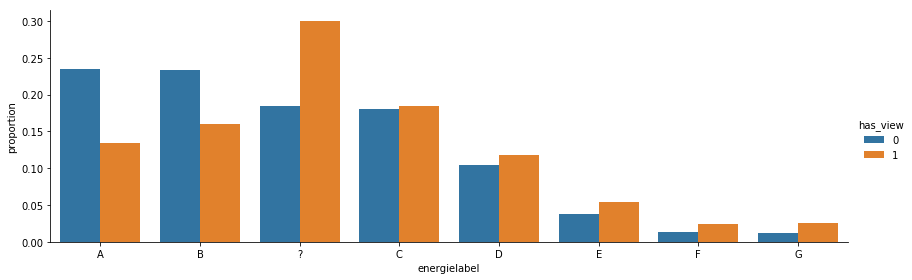

In [13]:
x, y, hue = "energielabel", "proportion", "has_view"
#hue_order = ["A", "B", "no_test"]

(data[x]
 .groupby(data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
# .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
 .pipe((sns.catplot, "data"), x=x, y=y, hue=hue, kind = 'bar', height = 4, aspect = 3))

13_23_foto    74629
8_12_foto     49832
24_foto       38581
max_7_foto    20002
Name: nr_foto, dtype: int64

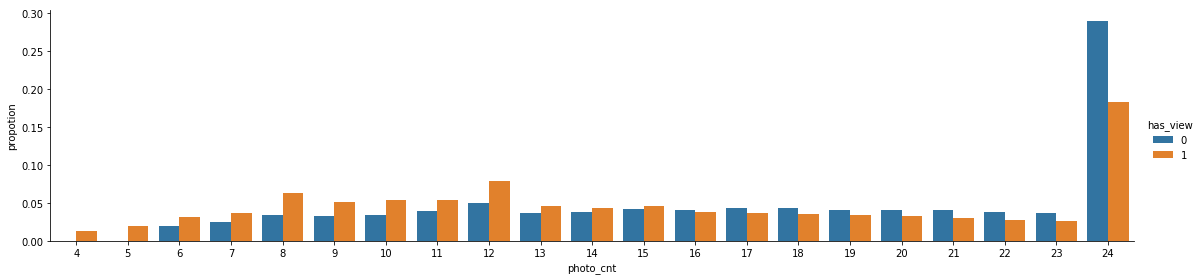

In [14]:
x, y, hue = "photo_cnt", "propotion", "has_view"
#hue_order = ["A", "B", "no_test"]

(data[x]
 .groupby(data[hue])
 .value_counts(normalize=True)
 .nlargest(40)
 .rename(y)
 .reset_index()
# .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
 .pipe((sns.catplot, "data"), x=x, y=y, hue=hue, kind = 'bar', height = 4, aspect = 4))

col = 'photo_cnt'
conditions = [data[col] <8, (data[col]>= 8) & (data[col]<= 12),(data[col]>= 13) & (data[col]<= 23)]                                                                     
choices = ["max_7_foto","8_12_foto","13_23_foto"]
data['nr_foto'] = np.select(conditions, choices, default = "24_foto")
data['nr_foto'].value_counts()

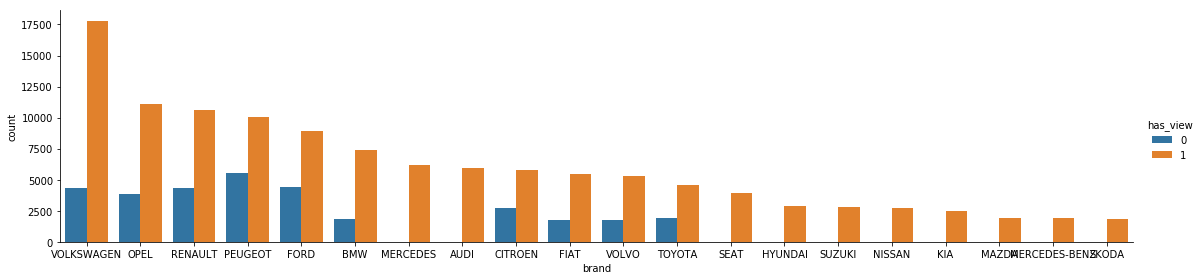

In [15]:
x, y, hue = "brand", "count", "has_view"

(data[x]
 .groupby(data[hue])
 .value_counts()
 .nlargest(30)
 .rename(y)
 .reset_index()
# .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
 .pipe((sns.catplot, "data"), x=x, y=y, hue=hue, kind = 'bar', height = 4, aspect = 4))
# later band use mean encoding

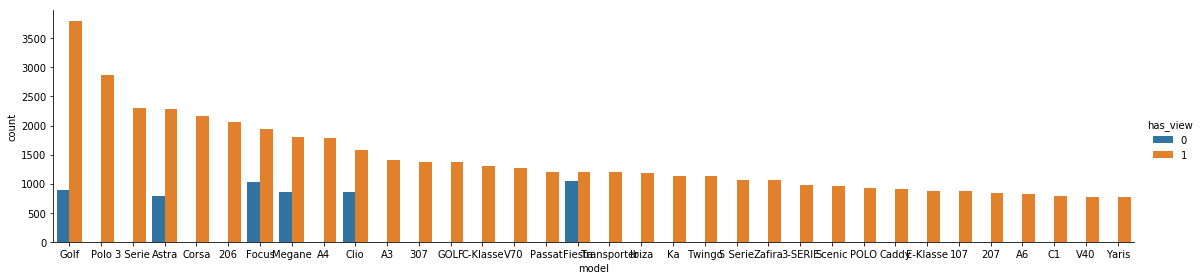

In [16]:
x, y, hue = "model", "count", "has_view"

(data[x]
 .groupby(data[hue])
 .value_counts()
 .nlargest(40)
 .rename(y)
 .reset_index()
# .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
 .pipe((sns.catplot, "data"), x=x, y=y, hue=hue, kind = 'bar', height = 4, aspect = 4))

In [17]:
data['brand'].value_counts().nlargest(30)

VOLKSWAGEN       22146
PEUGEOT          15560
RENAULT          15010
OPEL             14987
FORD             13316
BMW               9258
CITROEN           8487
MERCEDES          7809
FIAT              7202
VOLVO             7076
AUDI              7062
TOYOTA            6505
SEAT              4905
HYUNDAI           4549
KIA               4171
NISSAN            3866
SUZUKI            3678
SKODA             2737
MERCEDES-BENZ     2501
MAZDA             2396
MITSUBISHI        2263
MINI              1979
ALFA ROMEO        1577
HONDA             1541
CHEVROLET         1513
DAEWOO            1070
DAIHATSU          1052
LAND ROVER         935
SAAB               926
CHRYSLER           626
Name: brand, dtype: int64

In [18]:
data['brand'].value_counts(normalize=True).nlargest(30).sum()

0.9653580559865388

In [19]:
col = 'brand'
conditions = [data[col].isin(['VOLKSWAGEN', 'BMW', 'MERCEDES','OPEL','AUDI','MERCEDES-BENZ'])
             , data[col].isin(['PEUGEOT','RENAULT','CITROEN'])
             , data[col].isin(['FORD','CHEVROLET','CHRYSLER'])
             , data[col].isin(['VOLVO','SAAB'])
             , data[col].isin(['TOYOTA','NISSAN','SUZUKI','MAZDA','MITSUBISHI','HONDA','DAIHATSU'])
             , data[col].isin(['SEAT'])
             , data[col].isin(['HYUNDAI','KIA','DAEWOO'])
             , data[col].isin(['SKODA'])
             , data[col].isin(['MINI','LAND ROVER'])
             ]
choices = ["german","french","american","swedish","japanese","spanish","korean","czech","british"]
data['brand_nation'] = np.select(conditions, choices, default = "unknown")
data['brand'] = np.where(data['brand']=='MERCEDES-BENZ', 'MERCEDES', data['brand'])
data['brand_nation'].value_counts()

german      63763
french      39057
japanese    21301
american    15455
unknown     15120
korean       9790
swedish      8002
spanish      4905
british      2914
czech        2737
Name: brand_nation, dtype: int64

In [20]:
data['brand'].value_counts(normalize=True).nlargest(30).index.tolist()

['VOLKSWAGEN',
 'PEUGEOT',
 'RENAULT',
 'OPEL',
 'FORD',
 'MERCEDES',
 'BMW',
 'CITROEN',
 'FIAT',
 'VOLVO',
 'AUDI',
 'TOYOTA',
 'SEAT',
 'HYUNDAI',
 'KIA',
 'NISSAN',
 'SUZUKI',
 'SKODA',
 'MAZDA',
 'MITSUBISHI',
 'MINI',
 'ALFA ROMEO',
 'HONDA',
 'CHEVROLET',
 'DAEWOO',
 'DAIHATSU',
 'LAND ROVER',
 'SAAB',
 'CHRYSLER',
 'JAGUAR']

In [21]:
top30_brand = data['brand'].value_counts(normalize=True).nlargest(5).index.tolist()
top30_brand_model = data[data['brand'].isin(top30_brand)]['model'].value_counts(normalize=True).index.tolist()

In [22]:
data['model'].value_counts(normalize=True).nlargest(100).sum()

0.6102084744651558

## 3.2 Distribution of has_view by Date Fields

* Sunday has the lowest amount of new ads
* Wednesday also has less amount than other week day 
* 25th thanks black friday, 28th November is Cyber Monday 

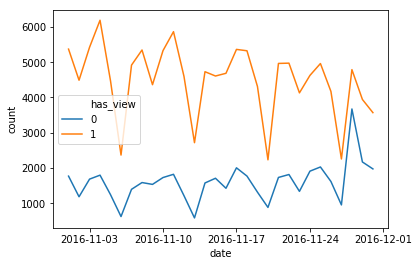

In [23]:
x, y, hue = "date", "count", "has_view"
(data[x]
 .groupby(data[hue])
 .value_counts()
# .nlargest(40)
 .rename(y)
 .reset_index()
# .pipe((sns.catplot, "data"), x=x, y=y, hue=hue, kind = 'bar', height = 4, aspect = 4))
 .pipe((sns.lineplot, "data"), x= x, y = y, hue = hue))

In [24]:
import datetime as dt
# create weekday and weekend and holiday days
data['days_before_cyber_monday'] = (dt.datetime(2016,11,28) - data['date']).dt.days

## 3.3 Distribution of has_view by Numerical Fields
Numerical Fields: kmstand, days_live, emissie, l2, vermogen, price
<br>
Creating buckets for the numerical fields
* 30% of ads are with auto-driving posibility (l2 >0)  --> use 'has_auto_driving' replace l2
* days_live is bucket into 'today', 'yesterday', '1_week', '1_month', & 'always'
* vermogen is bucket into ">75pk","75-100pk","101-125pk","126-150pk","151-200pk", ">200pk"
* emissie
* kmstand
* price

In [25]:
data['l2'].describe()

count     183044
unique        65
top         None
freq      122560
Name: l2, dtype: object

In [26]:
# create a few more fields 
data['has_kmstand'] = np.where(data['kmstand']>0, 1, 0)

data['l2_modified'] = np.where(data['l2']=='None', 0, data['l2'])
data['has_auto_driving'] = np.where(data['l2']=='None', 0, 1)
data['l2_modified']= pd.to_numeric(data['l2_modified'], errors='coerce')
data['l2_modified'].describe()

count    183044.000000
mean         44.410912
std          96.068165
min           0.000000
25%           0.000000
50%           0.000000
75%         101.000000
max        2831.000000
Name: l2_modified, dtype: float64

In [27]:
# 1/3 of cars have auto driving option
data['has_auto_driving'] .describe()

count    183044.000000
mean          0.330434
std           0.470371
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: has_auto_driving, dtype: float64

1_month      143770
1_week        22469
always         9747
yesterday      4449
today          2609
Name: days_post, dtype: int64

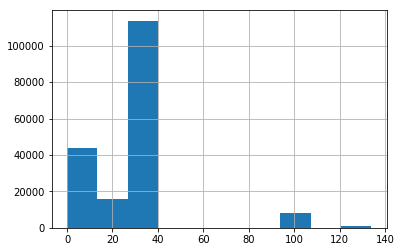

In [28]:
data['days_live'].hist()
col = 'days_live'
conditions = [data[col]==0, data[col]==1, (data[col] >1) & (data[col]<= 7),(data[col] >7) & (data[col]<= 31) ]
choices = ["today","yesterday","1_week","1_month"]
data['days_post'] = np.select(conditions, choices, default = "always")
data['days_post'].value_counts()

<75pk        83547
75-100pk     52693
101-125pk    25289
126-150pk     8558
151-200pk     6634
>200pk        6323
Name: vermogen_group, dtype: int64

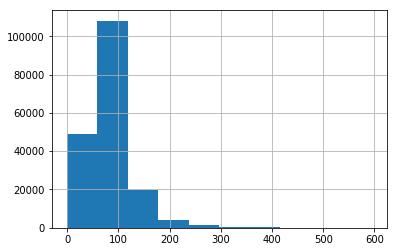

In [29]:
data['vermogen'].hist()
data['vermogen'].quantile([0.01, 0.05,0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
col = 'vermogen'
conditions = [data[col]<75, (data[col] >75) & (data[col]<= 100)
              ,(data[col] >100) & (data[col]<= 125) ,(data[col] >125) & (data[col]<= 150) 
             ,(data[col] >150) & (data[col]<= 200)]
choices = ["<75pk","75-100pk","101-125pk","126-150pk","151-200pk"]
data['vermogen_group'] = np.select(conditions, choices, default = ">200pk")
data['vermogen_group'].value_counts()

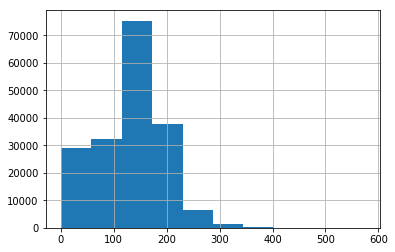

In [30]:
data['emissie'].hist()
data['emissie'].quantile([0.01, 0.05,0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
data['emissie'].fillna(0, inplace=True)

count    183044.000000
mean          0.011926
std           0.108554
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: new_auto, dtype: float64

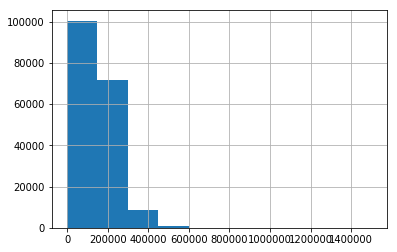

In [31]:
data['kmstand'].hist()
data['kmstand'].quantile([0.01,0.02, 0.05,0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
data['has_kmstand'] = np.where(data['kmstand']>0, 1, 0)
# Assumption: kmstand is related to bouwjaar and the size of the car ( imagine the size of the car represent the usage frequency)
data['kmstand_pro'] = data.groupby(['bouwjaar', 'nr_door'])['kmstand'].transform(lambda x: x.fillna(x.median()))
data['kmstand_pro'].describe()
data['new_auto']= np.where((data['kmstand']<100) & (data['kmstand']>0), 1, 0)
data['new_auto'].describe()

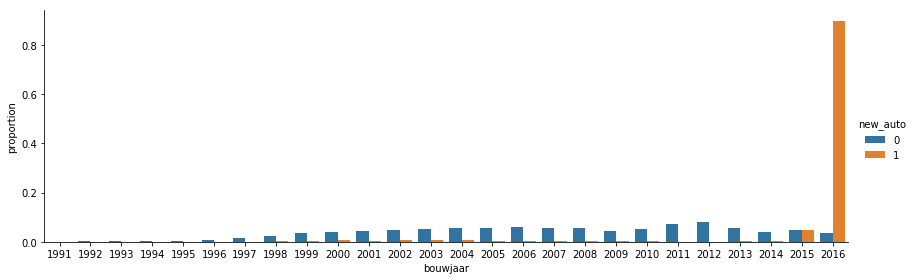

In [32]:
x, y, hue = "bouwjaar", "proportion", "new_auto"
#hue_order = ["A", "B", "no_test"]

(data[x]
 .groupby(data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
# .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
 .pipe((sns.catplot, "data"), x=x, y=y, hue=hue, kind = 'bar', height = 4, aspect = 3))

In [33]:
data['price'].quantile([0.05,0.06,0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.05         0.0
0.06      1000.0
0.10      7990.0
0.25     21500.0
0.50     59500.0
0.75    119500.0
0.90    202450.0
0.95    279950.0
0.99    529000.0
Name: price, dtype: float64

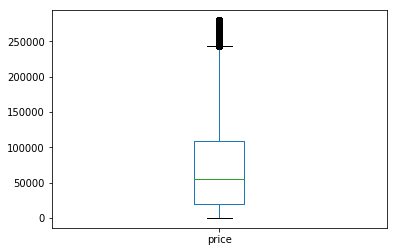

In [34]:
y = data['price']
removed_outliers= y.between(y.quantile(.01), y.quantile(.95))
y[removed_outliers].plot.box()

In [35]:
y[removed_outliers].describe()

count    173903.000000
mean      72405.714036
std       64647.646332
min           0.000000
25%       19500.000000
50%       54500.000000
75%      109000.000000
max      279950.000000
Name: price, dtype: float64

In [36]:
data['price_zero'] = np.where(data['price']>0, 0, 1)

user activitiy is evaluated by column 'has_view' <br>
i.e. if any user activity happens, including telephone call, webclicks, emails, bids, the has_view = 1 <br>
* bouwjaar is negatively related to user activity (-0.31 medium correlation) <br>
* photo_count is also negatively related to user activity (-0.15 small correlation) <br>
* kmstand is positively related to 
* vermogen, days_live & price are barely related to user activity (0.057, 0.051,-0.02) <br>
  A more powerful car is not necessarilly more interested to the user <br>
  An ad stays longer would not attract more attention to the user <br>
  Not all users are price sensitive, you get what you paid for is the mindeset <br> 


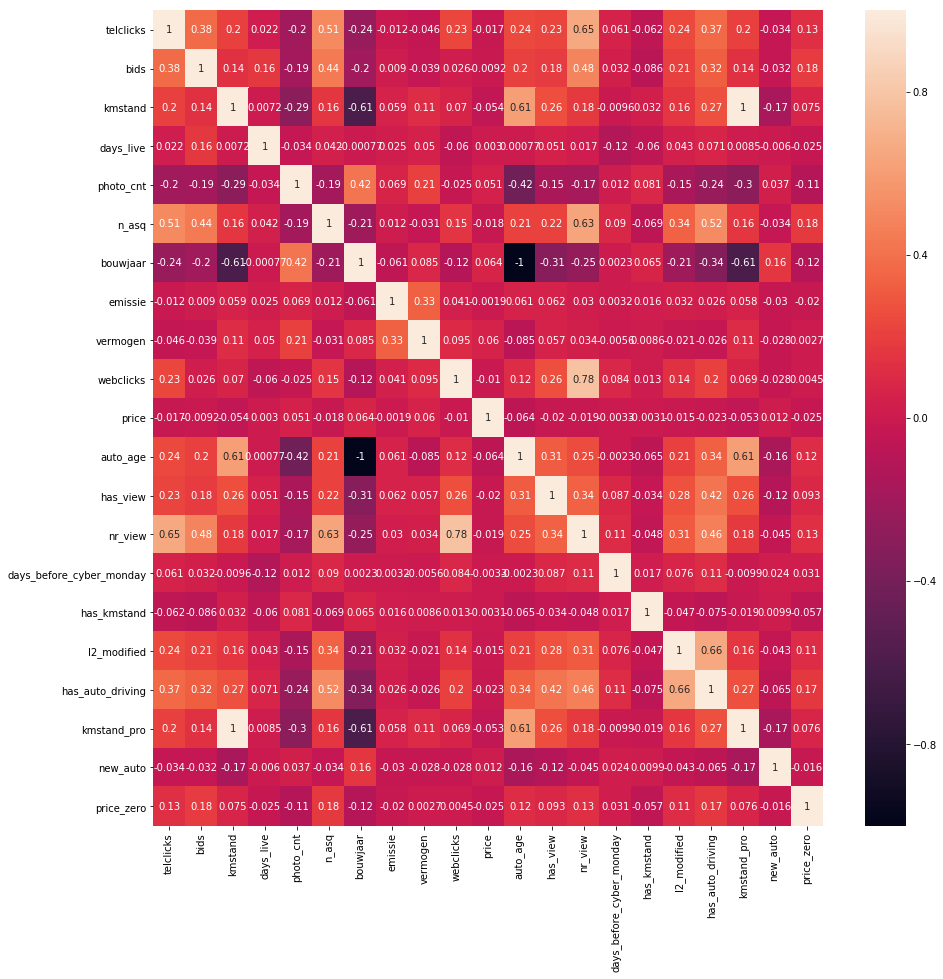

In [41]:
# Check correlation with all numerical columns
fig, ax = plt.subplots(figsize=(15,15))         
corr_all = data.loc[:, ~data.columns.isin(['src_ad_id'])].corr()
sns.heatmap(corr_all, annot=True, ax = ax)

In [38]:
data.to_csv('car_extra.csv')